In [9]:
import os
import cv2
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [10]:
# 경로 지정
print('현재 경로 : ',os.getcwd())

train_dir = './Train/'
val_dir = './Validation/'
test_dir = './Test/'


현재 경로 :  c:\Users\AISW-203-104\Desktop\Keras\5_Flower_Types_Classification_Generator


In [11]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255
)


In [12]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)



Found 3825 images belonging to 5 classes.
Found 675 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


(array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        

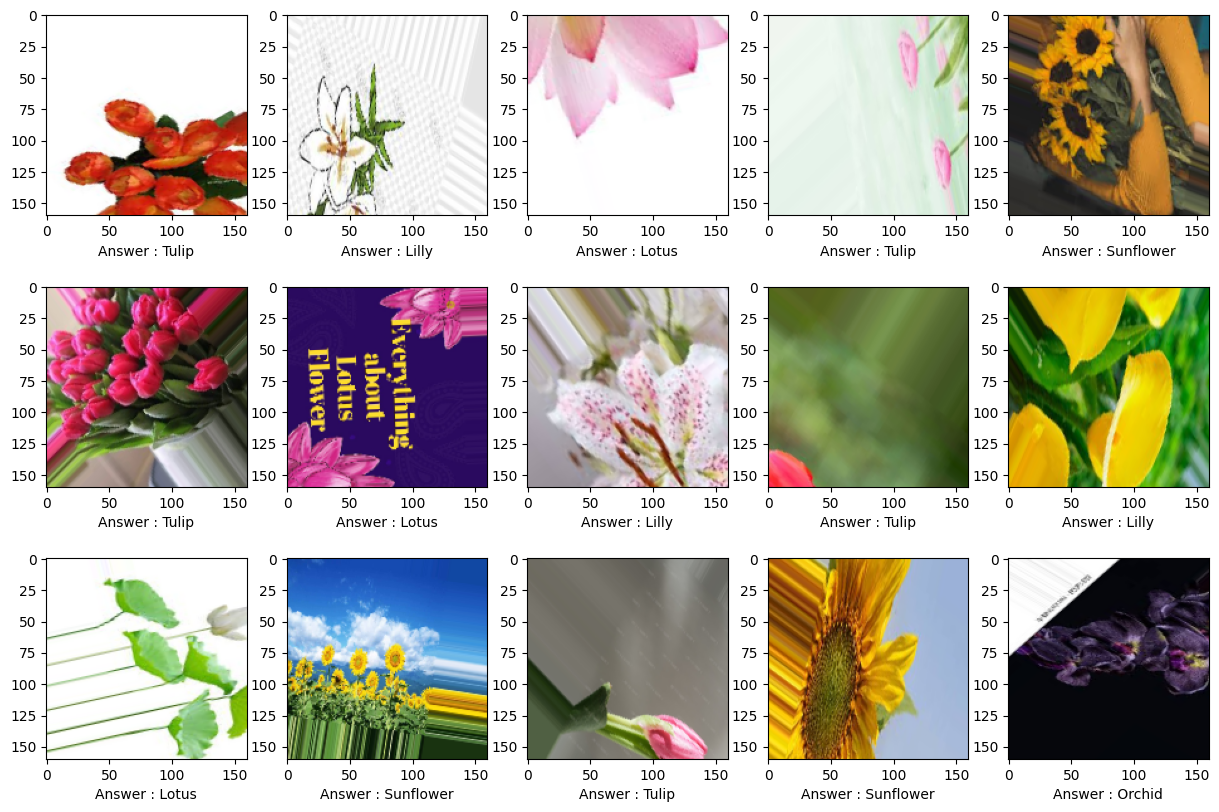

In [13]:
# train 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)
print()

images, labels = batch

print(len(images))
print()
print(len(labels))
print()
print(labels)  # ImageDataGenerator로 전처리 하면 자동으로 원-핫 인코딩으로 준비 됨.
# 따라서 신경망 모델 컴파일 시 loss = 'categorical_crossentropy'로 해야 함.


# train data idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(f"Answer : {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()


In [14]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(40, 40, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(20, 20, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(10, 10, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(5, 5, 128)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.

model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.
 
model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()
 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 160, 160, 128)     3584      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 80, 80, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 80, 80, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 40, 40, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 40, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 20, 20, 128)      

In [15]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T3_N12_size160_conv5-128_den3-200_epo15_val15.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [16]:
# 신경망 모델 훈련
history = model.fit(train_gen, epochs=15, validation_data=val_gen, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/15
120/120 [==============================] - 378s 3s/step - loss: 1.5740 - accuracy: 0.2437 - val_loss: 1.3865 - val_accuracy: 0.3452
Epoch 2/15
120/120 [==============================] - 369s 3s/step - loss: 1.3495 - accuracy: 0.4055 - val_loss: 1.1898 - val_accuracy: 0.4652
Epoch 3/15
120/120 [==============================] - 364s 3s/step - loss: 1.2582 - accuracy: 0.4541 - val_loss: 1.1640 - val_accuracy: 0.5067
Epoch 4/15
120/120 [==============================] - 360s 3s/step - loss: 1.2158 - accuracy: 0.4967 - val_loss: 1.1737 - val_accuracy: 0.5156
Epoch 5/15
120/120 [==============================] - 359s 3s/step - loss: 1.1847 - accuracy: 0.5119 - val_loss: 1.0911 - val_accuracy: 0.5526
Epoch 6/15
120/120 [==============================] - 357s 3s/step - loss: 1.1745 - accuracy: 0.5208 - val_loss: 1.1254 - val_accuracy: 0.5348
Epoch 7/15
120/120 [==============================] - 360s 3s/step - loss: 1.1594 - accuracy: 0.5289 - val_loss: 1.0807 - val_accuracy: 0.5659

In [17]:
# history의 key값 알아보기
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


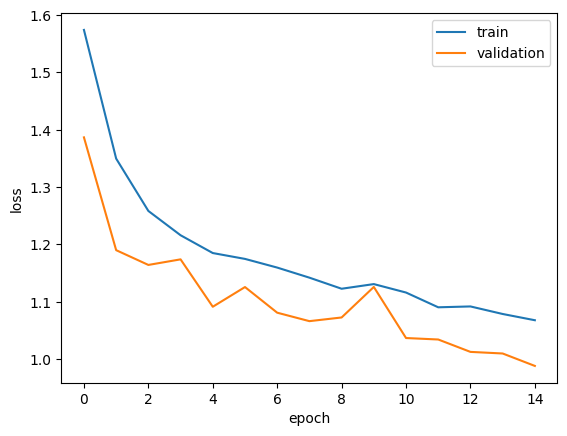

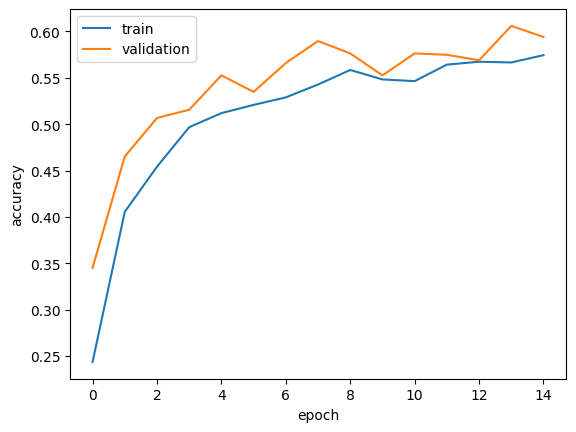

In [18]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [19]:
# test 평가
model.evaluate(test_gen)

16/16 [==============================] - 6s 363ms/step - loss: 0.9731 - accuracy: 0.6100


[0.97312992811203, 0.6100000143051147]

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[0. 0. 1. 0. 0.]
32
1/1 [==============================] - 1s 503ms/step
[[4.20670569e-01 2.12682933e-01 2.14100957e-01 1.91361289e-02
  1.33409366e-01]
 [2.94503361e-01 7.39019439e-02 8.93712863e-02 2.10014358e-01
  3.32209110e-01]
 [2.84126490e-01 1.66699603e-01 1.12641841e-01 2.89893802e-02
  4.07542616e-01]
 [3.12512159e-01 4.79929522e-02 5.46645895e-02 1.36901233e-02
  5.71140110e-01]
 [1.55782819e-01 1.89408675e-0

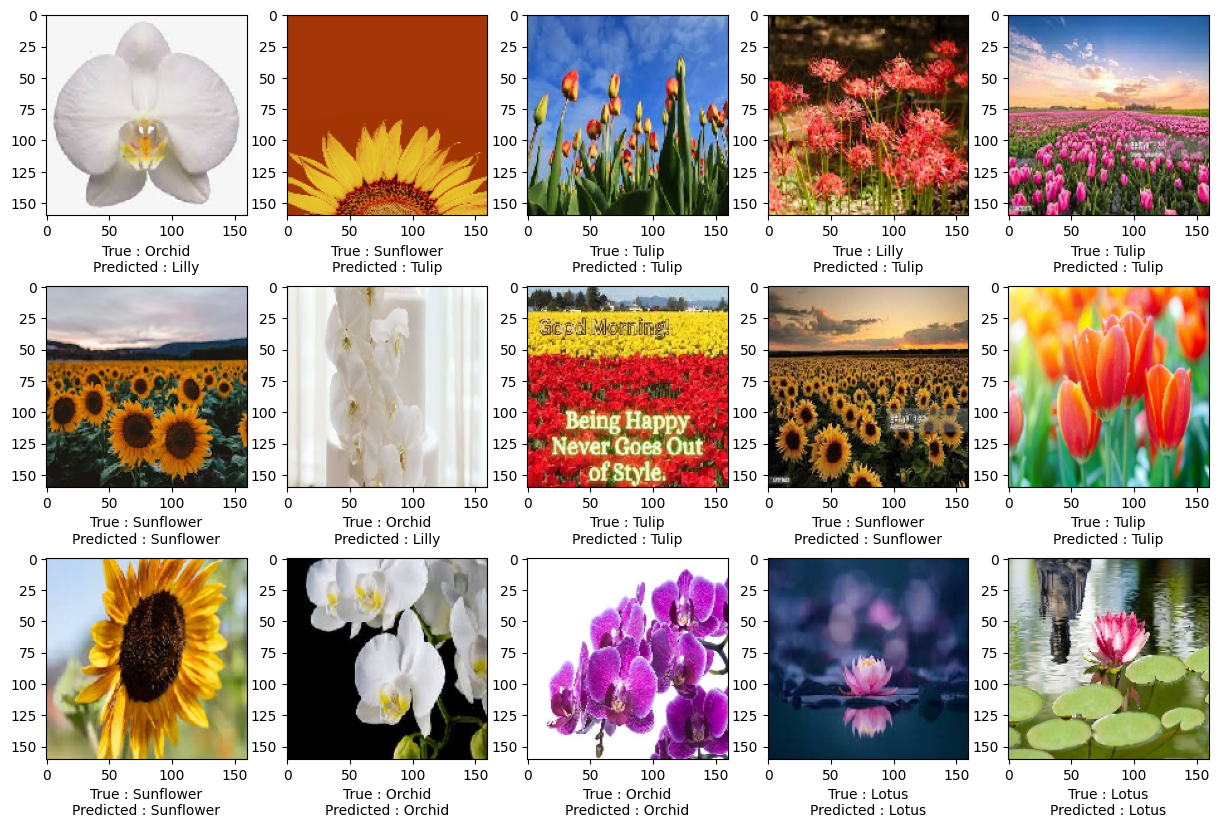

In [20]:
# test 평가 시각화
test_images, test_labels = next(test_gen)  

print(test_labels)
print(test_labels[0])
print(len(test_labels))

pred = model.predict(test_images)

print(pred)
print(pred[0])
print(len(pred))

plt.figure(figsize=(15, 10))
for i in range(15):  
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[i])
    true_label = labels_dict[np.argmax(test_labels[i])]  
    predicted_label = labels_dict[np.argmax(pred[i])]  
    plt.xlabel(f'True : {true_label}\nPredicted : {predicted_label}')

plt.show()